In [93]:
## installations

import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn-extra

# Raptor timeline - overview

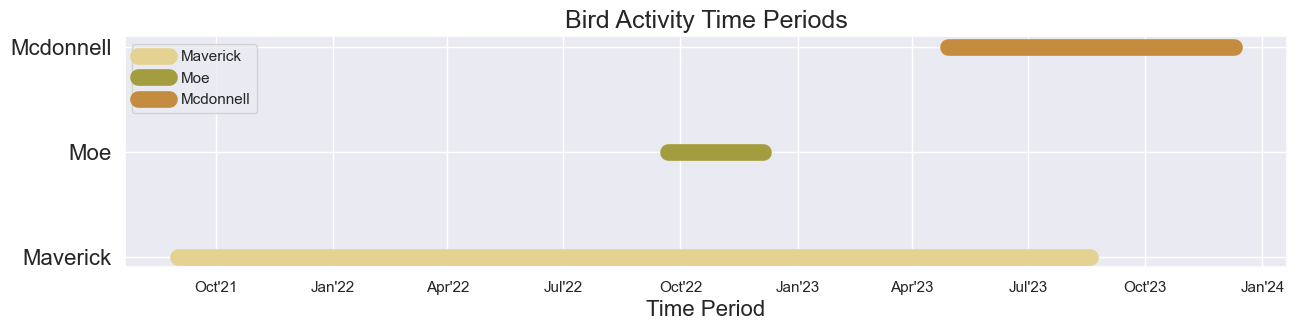

In [158]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'bird': ['Maverick', 'Moe', 'Mcdonnell'],
    'start_date': ['9/01/21', '9/21/22', '4/29/23'],
    'end_date': ['8/19/23', '12/5/22', '12/10/23']
}

# Convert date strings to datetime objects
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])

# Create a DataFrame
df = pd.DataFrame(data)

# Line colors
line_colors = ['#e4d292', '#a49d3f', '#c38c3f']

# Plotting
fig, ax = plt.subplots(figsize=(15, 3))

for idx, (row, color) in enumerate(zip(df.iterrows(), line_colors)):
    _, row = row
    ax.plot([row['start_date'], row['end_date']], [idx, idx], label=row['bird'], linewidth=12, color=color)

# Beautify the plot
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['bird'], fontsize=16)

# Format datetime on x-axis to Dec'21 format
date_format = "%b'%y"
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))

ax.set_xlabel('Time Period', fontsize=16)
# ax.set_ylabel('Bird Name', fontsize=12)
ax.set_title('Bird Activity Time Periods', fontsize=18)

# Add legend
ax.legend()

plt.savefig("figures/bird-time-period.jpeg")
# plt.show()


# Ping frequency - month

In [16]:
df = pd.read_csv('data/MoveBankData/WNYRWC01-7262-maverick.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [18]:
# Group by month-year and get count of rows
df['month_year'] = df['timestamp'].dt.to_period('M')
df_counts = df.groupby('month_year').size().reset_index(name='count')

df_counts

,month_year,count
0,2021-03,55
1,2021-09,11
2,2021-10,198
3,2021-11,98
4,2021-12,35
5,2022-01,103
6,2022-02,170
7,2022-03,1285
8,2022-04,2723
9,2022-05,1363


In [20]:
df_counts.to_csv('sample-1.csv', index=False)
df_counts = pd.read_csv('sample-1.csv')
df_counts.head()

,month_year,count
0,2021-03,55
1,2021-09,11
2,2021-10,198
3,2021-11,98
4,2021-12,35


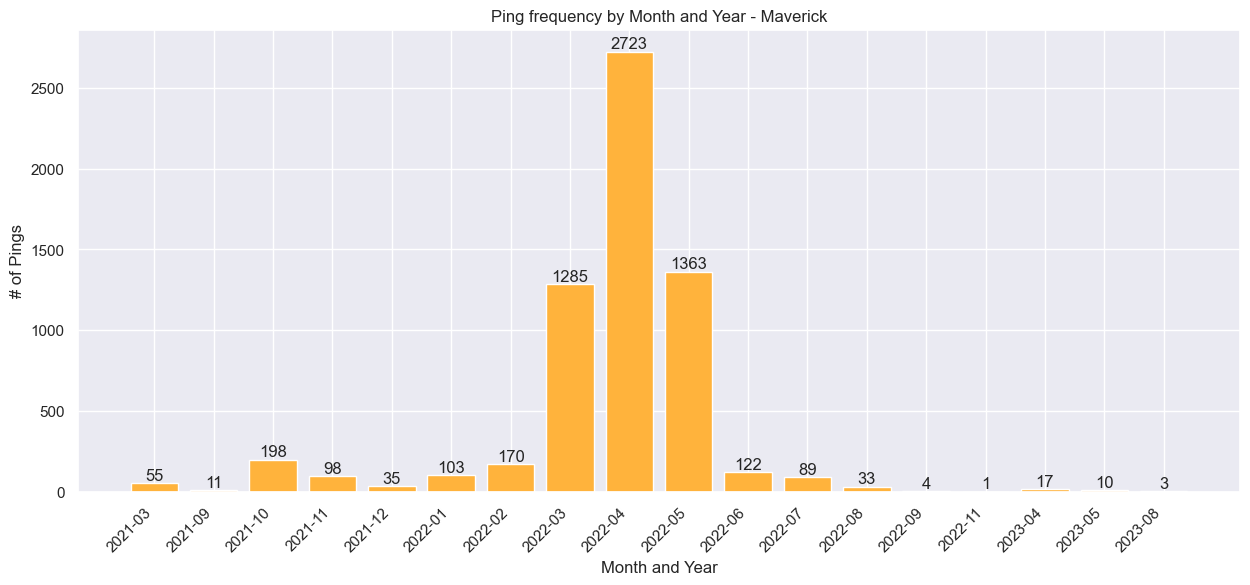

In [21]:
# Plot with month-year on x-axis and count on y-axis
fig, ax = plt.subplots(figsize=(15, 6))

# You can customize the plot further based on your needs
bars = ax.bar(df_counts['month_year'].astype(str), df_counts['count'], color='#ffb33c')

# Annotate bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# You can customize the plot further based on your needs
ax.set_title('Ping frequency by Month and Year - Maverick')
ax.set_xlabel('Month and Year')
ax.set_ylabel('# of Pings')


# Format x-axis labels as month and year
ax.set_xticks(df_counts['month_year'])
ax.set_xticklabels(df_counts['month_year'].astype(str), rotation=45, ha='right')

# Save the plot as a JPEG file
plt.savefig('figures/pings-month-mav.jpg')

plt.show()

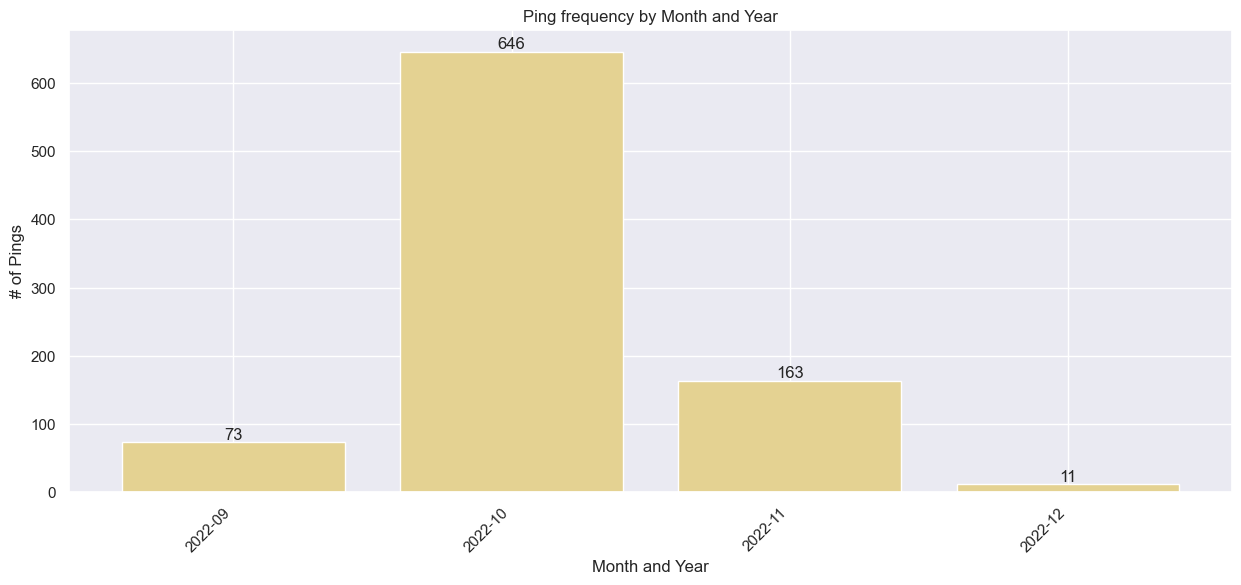

In [22]:
df = pd.read_csv('data/MoveBankData/WNYRWC02-9422-moe.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by month-year and get count of rows
df['month_year'] = df['timestamp'].dt.to_period('M')
df_counts = df.groupby('month_year').size().reset_index(name='count')

df_counts.to_csv('sample-1.csv', index=False)
df_counts = pd.read_csv('sample-1.csv')

# Plot with month-year on x-axis and count on y-axis
fig, ax = plt.subplots(figsize=(15, 6))

# ffb33c
# e4d292
# c38c3f

# You can customize the plot further based on your needs
bars = ax.bar(df_counts['month_year'].astype(str), df_counts['count'], color='#e4d292')

# Annotate bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# You can customize the plot further based on your needs
ax.set_title('Ping frequency by Month and Year')
ax.set_xlabel('Month and Year')
ax.set_ylabel('# of Pings')


# Format x-axis labels as month and year
ax.set_xticks(df_counts['month_year'])
ax.set_xticklabels(df_counts['month_year'].astype(str), rotation=45, ha='right')

# Save the plot as a JPEG file
plt.savefig('figures/pings-month-moe.jpg')

plt.show()

In [23]:
df = pd.read_csv('data/mcdonell-LocationData.csv')
df['timestamp'] = pd.to_datetime(df['Transmitting time'])


# Group by month-year and get count of rows
df['month_year'] = df['timestamp'].dt.to_period('M')
df_counts = df.groupby('month_year').size().reset_index(name='count')

df_counts

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,month_year,count
0,2023-05,5890
1,2023-06,3780
2,2023-07,1598
3,2023-08,364
4,2023-09,894
5,2023-10,112


In [24]:
df_counts.to_csv('sample-1.csv', index=False)
df = pd.read_csv('sample-1.csv')
df.head()

,month_year,count
0,2023-05,5890
1,2023-06,3780
2,2023-07,1598
3,2023-08,364
4,2023-09,894


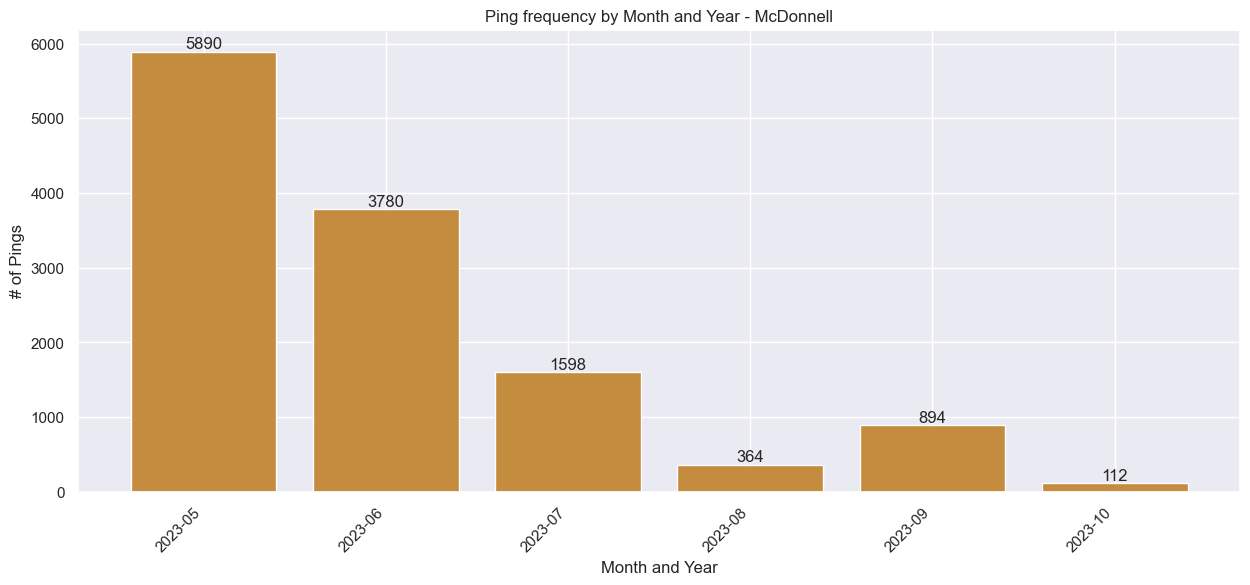

In [25]:
# Plot with month-year on x-axis and count on y-axis
fig, ax = plt.subplots(figsize=(15, 6))

# You can customize the plot further based on your needs
bars = ax.bar(df['month_year'].astype(str), df['count'], color='#c38c3f')

# Annotate bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# You can customize the plot further based on your needs
ax.set_title('Ping frequency by Month and Year - McDonnell')
ax.set_xlabel('Month and Year')
ax.set_ylabel('# of Pings')


# Format x-axis labels as month and year
ax.set_xticks(df['month_year'])
ax.set_xticklabels(df['month_year'].astype(str), rotation=45, ha='right')

# Save the plot as a JPEG file
plt.savefig('figures/pings-month-mcd.jpg')

plt.show()

## Method: clustering area of movement and merging environmental data

In [46]:
import pandas as pd
import seaborn as sns
## for seasonal data for maps
df = pd.read_csv('output/moe-Fall.csv').drop(
    columns=[
        'event-id', 'visible', 'import-marked-outlier', 'sensor-type', 'individual-taxon-canonical-name',
        'tag-local-identifier', 'individual-local-identifier', 'study-name', 'season'
    ]
)

df.head()


,timestamp,location-long,location-lat,external-temperature,ground-speed,heading,height-above-msl,gls:light-level,year,month,day
0,2022-09-21 19:46:10,-78.639795,42.948109,28.0,28.6,264.2,218.7,1806.0,2022,9,21
1,2022-09-21 21:00:11,-78.769645,42.745664,40.4,4.3,43.1,282.9,18373.0,2022,9,21
2,2022-09-22 00:00:09,-78.773299,42.745149,29.2,0.0,0.0,275.6,0.0,2022,9,22
3,2022-09-22 03:00:16,-78.773299,42.744970,28.8,0.0,0.0,259.6,0.0,2022,9,22
4,2022-09-22 06:00:31,-78.773331,42.745258,21.5,0.0,0.0,231.4,0.0,2022,9,22


In [47]:
df.shape

(882, 11)

<AxesSubplot:xlabel='location-long', ylabel='location-lat'>

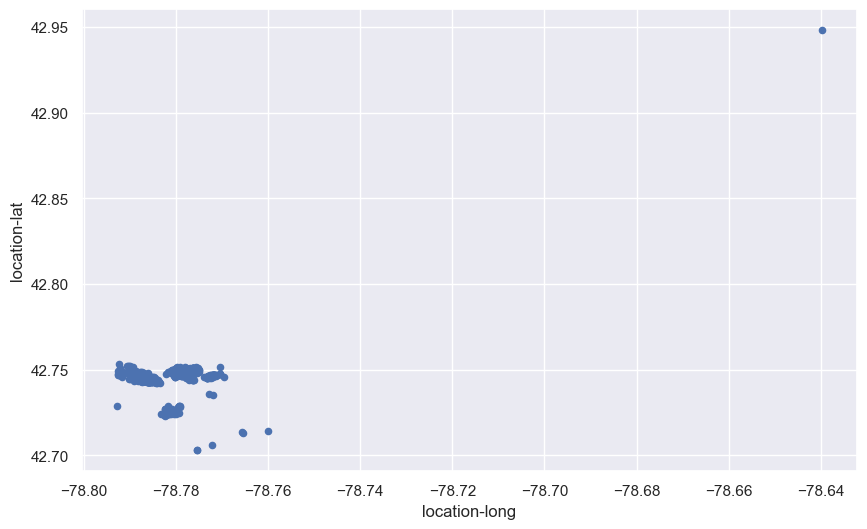

In [48]:
sns.set_theme(style="darkgrid")

df.plot(x="location-long", y="location-lat", kind='scatter', marker='o', figsize=(10, 6))

In [49]:
# dropping outlier coords
df_21 = df[df['location-long'] < -78.74]

print(df_21['timestamp'].min(), df_21['timestamp'].max(), df_21.shape)


2022-09-21 21:00:11 2022-11-30 21:00:39 (881, 11)


/var/folders/bb/g0b3x6zs2l90112h4yj6yy400000gn/T/ipykernel_97678/2073526924.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['c_labels'] = kmedoids_model.labels_


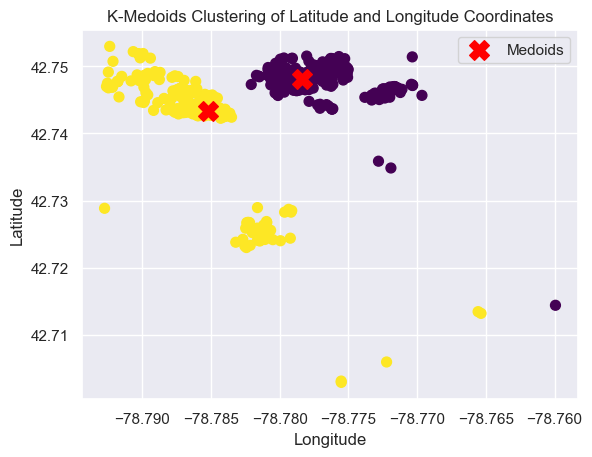

In [50]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'latitude' and 'longitude' columns
# You can create a DataFrame for testing purposes using the following code:
# df = pd.DataFrame({'latitude': [x1, x2, x3, ...], 'longitude': [y1, y2, y3, ...]})

# Extracting coordinates from the DataFrame
coordinates = df_21[['location-lat', 'location-long']]

# Specifying the number of clusters (you can adjust this)
num_clusters = 2

# Initializing the K-Medoids model
kmedoids_model = KMedoids(n_clusters=num_clusters, random_state=42)

# Fitting the model to the data
kmedoids_model.fit(coordinates)

# Extracting cluster labels
df_21['c_labels'] = kmedoids_model.labels_

# Extracting cluster medoids (representative points)
medoids = coordinates.iloc[kmedoids_model.medoid_indices_]

# Visualizing the clusters and medoids
plt.scatter(coordinates['location-long'], coordinates['location-lat'], c=df_21['c_labels'], cmap='viridis', s=50)
plt.scatter(medoids['location-long'], medoids['location-lat'], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering of Latitude and Longitude Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [51]:
# print sample mediods obtained, based on median density
medoids

,location-lat,location-long
762,42.748093,-78.778362
415,42.743370,-78.785242


In [52]:
c_df = df_21[df_21['c_labels'] == 0]

print(c_df['timestamp'].min(), c_df['timestamp'].max(), c_df.shape)

2022-09-21 21:00:11 2022-11-30 21:00:39 (323, 12)


In [53]:
c_df = c_df.groupby(['year', 'month', 'day']).mean().reset_index()

c_df.shape

(52, 11)

In [62]:
wdf = pd.read_csv('data/external-dataset/fall_2021_POWER_Point_Daily_20210929_20211130_042d7500N_078d7700W_LST.csv')
wdf = wdf.rename(columns={
    'YEAR': 'year',
    'MO': 'month',
    'DY': 'day',
    'WS50M_MIN': 'wind-speed-external',
    'PRECTOTCORR': 'percipitation',
    'QV2M': 'humidity'
})
wdf.head()

,year,month,day,wind-speed-external,percipitation,humidity
0,2021,9,29,2.98,0.26,6.96
1,2021,9,30,0.25,0.21,6.53
2,2021,10,1,2.45,0.01,7.14
3,2021,10,2,5.33,0.10,8.48
4,2021,10,3,2.92,20.84,11.60


In [55]:
##
# Merge DataFrames based on the 'year', 'month', and 'day' columns
##

merged_df = pd.merge(c_df, wdf, left_on=['year', 'month', 'day'], right_on=['year', 'month', 'day'])

# Display the resulting DataFrame
merged_df.shape


(0, 14)

In [366]:
# existing_data = pd.read_csv('output/mav-fall-weather-2021.csv')
# # .drop(columns=['Unnamed: 0']).round(2)

# # Append the new data to the existing DataFrame
# updated_data = existing_data.append(merged_df, ignore_index=True)

# # # Write the updated DataFrame back to the CSV file
# updated_data.to_csv('output/mav-fall-weather-2021.csv', index=False)

merged_df.to_csv('output/mav-fall-weather-2021.csv', index=False)

In [61]:
merged_df

,year,month,day,location-long,location-lat,external-temperature,ground-speed,heading,height-above-msl,gls:light-level,c_labels,wind-speed-external,percipitation,humidity


In [63]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import mse, rmse, meanabs

merged_df = pd.read_csv('output/mav-fall-weather-2021.csv')
data = merged_df[['heading', 'external-temperature']]

# Perform Granger causality test
max_lag = 5  # You can adjust this parameter based on your data
test_result = grangercausalitytests(data, max_lag, verbose=True)

# Print the results
for lag, result in test_result.items():
    print(f"\nGranger Causality Test at lag {lag}:")
    for key, value in result[0].items():
        print(f"{key}: {value}")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2368  , p=0.6286  , df_denom=53, df_num=1
ssr based chi2 test:   chi2=0.2502  , p=0.6170  , df=1
likelihood ratio test: chi2=0.2496  , p=0.6174  , df=1
parameter F test:         F=0.2368  , p=0.6286  , df_denom=53, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2308  , p=0.7947  , df_denom=50, df_num=2
ssr based chi2 test:   chi2=0.5079  , p=0.7757  , df=2
likelihood ratio test: chi2=0.5055  , p=0.7766  , df=2
parameter F test:         F=0.2308  , p=0.7947  , df_denom=50, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0302  , p=0.9929  , df_denom=47, df_num=3
ssr based chi2 test:   chi2=0.1040  , p=0.9914  , df=3
likelihood ratio test: chi2=0.1039  , p=0.9914  , df=3
parameter F test:         F=0.0302  , p=0.9929  , df_denom=47, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1191  , p=0.9750  , df_d

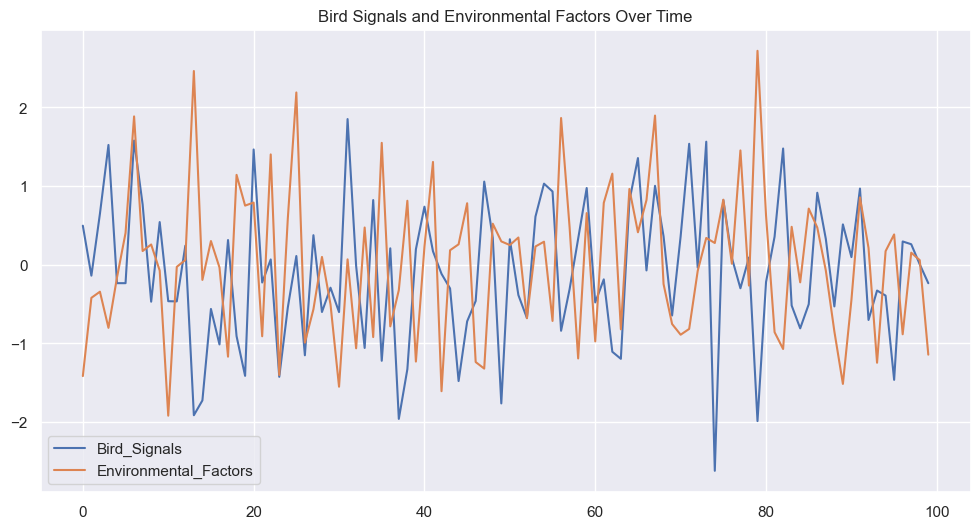


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9081  , p=0.1704  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=1.9677  , p=0.1607  , df=1
likelihood ratio test: chi2=1.9484  , p=0.1628  , df=1
parameter F test:         F=1.9081  , p=0.1704  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9993  , p=0.3720  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=2.1061  , p=0.3489  , df=2
likelihood ratio test: chi2=2.0838  , p=0.3528  , df=2
parameter F test:         F=0.9993  , p=0.3720  , df_denom=93, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0066  , p=0.3937  , df_denom=90, df_num=3
ssr based chi2 test:   chi2=3.2548  , p=0.3540  , df=3
likelihood ratio test: chi2=3.2014  , p=0.3616  , df=3
parameter F test:         F=1.0066  , p=0.3937  , df_denom=90, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9621  , p=0.4325  , df_d

In [64]:
# Generate example data (replace this with your actual data)
np.random.seed(42)
n_obs = 100
bird_signals = np.random.randn(n_obs)  # Replace with actual bird signal data
environmental_factors = np.random.randn(n_obs)  # Replace with actual environmental factor data

# Create a DataFrame
data = pd.DataFrame({'Bird_Signals': bird_signals, 'Environmental_Factors': environmental_factors})

# Plot the data
data.plot(figsize=(12, 6))
plt.title('Bird Signals and Environmental Factors Over Time')
plt.show()

# Perform Granger causality test
max_lag = 5  # You can adjust this parameter based on your data
test_result = grangercausalitytests(data, max_lag, verbose=True)

# Print the results
for lag, result in test_result.items():
    print(f"\nGranger Causality Test at lag {lag}:")
    for key, value in result[0].items():
        print(f"{key}: {value}")

# You can analyze the results and draw conclusions about causality


# Ping by Season

In [30]:
df = pd.read_csv('data/mcdonell-LocationData.csv')
df['timestamp'] = pd.to_datetime(df['Collecting time'], format="%Y-%m-%d %H:%M:%S.%f")

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

df1 = pd.read_csv('data/MoveBankData/WNYRWC02-9422-moe.csv')
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month
df1['day'] = df1['timestamp'].dt.day

df2 = pd.read_csv('data/MoveBankData/WNYRWC01-7262-maverick.csv')
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

df2['year'] = df2['timestamp'].dt.year
df2['month'] = df2['timestamp'].dt.month
df2['day'] = df2['timestamp'].dt.day

def get_season(month):
    seasons = {
        1: "Winter",
        2: "Winter",
        3: "Spring",
        4: "Spring",
        5: "Spring",
        6: "Summer",
        7: "Summer",
        8: "Summer",
        9: "Fall",
        10: "Fall",
        11: "Fall",
        12: "Winter"
    }
    return seasons[month]

df['season'] = df['month'].apply(get_season)
df1['season'] = df1['month'].apply(get_season)
df2['season'] = df2['month'].apply(get_season)

In [31]:
dfc = df.groupby('season').size().reset_index(name='count')

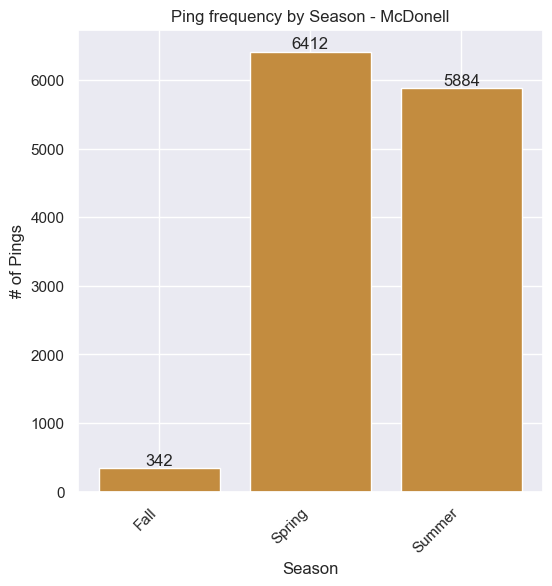

In [32]:
# Plot with month-year on x-axis and count on y-axis
fig, ax = plt.subplots(figsize=(6, 6))

# You can customize the plot further based on your needs
bars = ax.bar(dfc['season'].astype(str), dfc['count'], color='#c38c3f')

# Annotate bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# You can customize the plot further based on your needs
# ax.bar(df['month_year'].astype(str), df['count'], color='#ffb33c')
ax.set_title('Ping frequency by Season - McDonell')
ax.set_xlabel('Season')
ax.set_ylabel('# of Pings')


# Format x-axis labels as month and year
ax.set_xticks(dfc['season'])
ax.set_xticklabels(dfc['season'].astype(str), rotation=45, ha='right')

# Save the plot as a JPEG file
# plt.savefig('figures/pings-season-mcd.jpg')

plt.show()

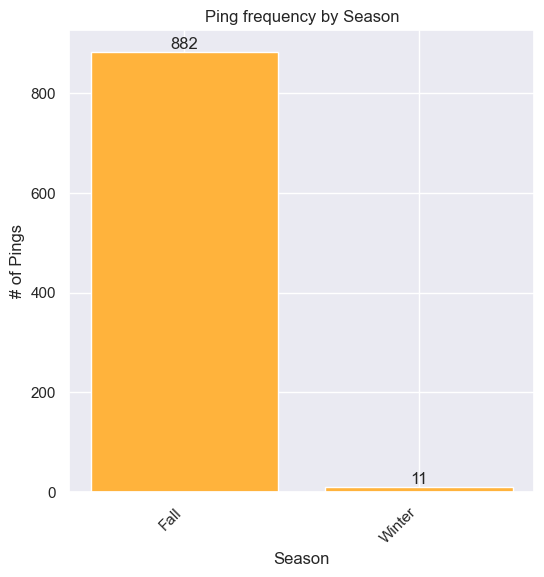

In [33]:
dfc = df1.groupby('season').size().reset_index(name='count')

# Plot with month-year on x-axis and count on y-axis
fig, ax = plt.subplots(figsize=(6, 6))

# ffb33c
# e4d292
# c38c3f


# You can customize the plot further based on your needs
bars = ax.bar(dfc['season'].astype(str), dfc['count'], color='#ffb33c')

# Annotate bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# You can customize the plot further based on your needs
# ax.bar(df['month_year'].astype(str), df['count'], color='#ffb33c')
ax.set_title('Ping frequency by Season')
ax.set_xlabel('Season')
ax.set_ylabel('# of Pings')


# Format x-axis labels as month and year
ax.set_xticks(dfc['season'])
ax.set_xticklabels(dfc['season'].astype(str), rotation=45, ha='right')

# Save the plot as a JPEG file
plt.savefig('figures/pings-season-mcd.jpg')

plt.show()

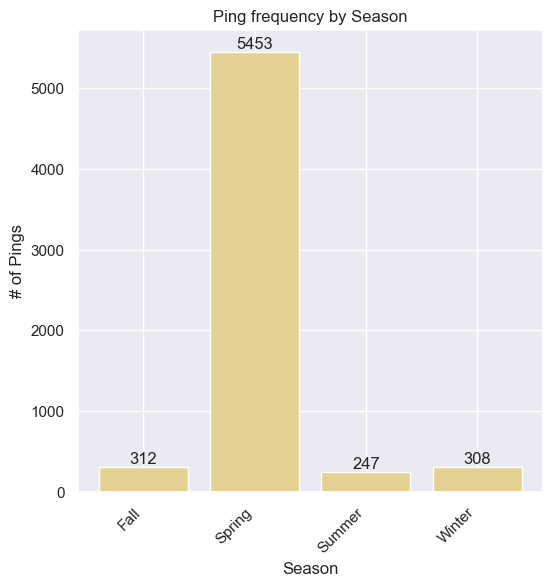

In [35]:
dfc = df2.groupby('season').size().reset_index(name='count')

# Plot with month-year on x-axis and count on y-axis
fig, ax = plt.subplots(figsize=(6, 6))

# ffb33c
# e4d292
# c38c3f


# You can customize the plot further based on your needs
bars = ax.bar(dfc['season'].astype(str), dfc['count'], color='#e4d292')

# Annotate bars with count values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# You can customize the plot further based on your needs
# ax.bar(df['month_year'].astype(str), df['count'], color='#ffb33c')
ax.set_title('Ping frequency by Season')
ax.set_xlabel('Season')
ax.set_ylabel('# of Pings')


# Format x-axis labels as month and year
ax.set_xticks(dfc['season'])
ax.set_xticklabels(dfc['season'].astype(str), rotation=45, ha='right')

# Save the plot as a JPEG file
plt.savefig('figures/pings-season-mav.jpg')

plt.show()

## Ping by time of day

In [223]:
# df = pd.read_csv("data/MoveBankData/WNYRWC02-9422-moe.csv").drop(columns=['study-name', 'individual-local-identifier', 'tag-local-identifier', 'individual-taxon-canonical-name',
#        'sensor-type', 'import-marked-outlier', 'visible', 'event-id'])

# df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

df = pd.read_csv("data/mcdonell-LocationData.csv")

df['timestamp'] = pd.to_datetime(df['Transmitting time'], format="%Y-%m-%d %H:%M:%S.%f")


# Extract hour of the day
df['hour_of_day'] = df['timestamp'].dt.hour

# Group by 6 hours and label each group
df['time_hr'] = (df['hour_of_day'] // 6).map({0: 'Night', 1: 'Morning', 2: 'Afternoon', 3: 'Evening'})
# df.head()

,UUID,Transmitting time,Collecting time,Longitude,Latitude,Altitude,Altitude (Ellipsoid),Speed,Course,Satellite used,Positioning mode,HorAccuracy,VerAccuracy,GPS time consumption,Data Source,HDOP,VDOP,timestamp,hour_of_day,time_hr
0,1200000668,2023-05-04T16:01:10.168Z,2023-04-29T18:26:38Z,-78.770131,42.745578,256.3,220.5,0.0,0.0,5,2,-99999.9,-99999.9,47,[1],1.76,2.28,2023-05-04 16:01:10.168000+00:00,16,Afternoon
1,1200000668,2023-05-04T16:01:10.169Z,2023-04-29T21:00:40Z,-78.769754,42.747690,286.7,250.9,0.0,0.0,8,2,-99999.9,-99999.9,37,[1],0.89,1.35,2023-05-04 16:01:10.169000+00:00,16,Afternoon
2,1200000668,2023-05-04T16:01:10.17Z,2023-04-30T00:00:39Z,-78.770394,42.747155,269.1,233.3,0.0,0.0,5,2,-99999.9,-99999.9,35,[1],2.40,4.37,2023-05-04 16:01:10.170000+00:00,16,Afternoon
3,1200000668,2023-05-04T16:01:10.17Z,2023-04-30T03:01:03Z,-78.770259,42.747078,252.6,216.8,0.0,0.0,4,2,-99999.9,-99999.9,61,[1],2.89,4.37,2023-05-04 16:01:10.170000+00:00,16,Afternoon
4,1200000668,2023-05-04T16:01:10.171Z,2023-04-30T06:00:56Z,-78.770368,42.747146,278.8,243.0,0.0,0.0,6,2,-99999.9,-99999.9,55,[1],1.54,1.62,2023-05-04 16:01:10.171000+00:00,16,Afternoon


In [224]:
bdf = pd.cut(df['hour_of_day'], bins=4)

bdf.value_counts()

(11.0, 16.5]     8140
(16.5, 22.0]     4359
(-0.022, 5.5]     139
(5.5, 11.0]         0
Name: hour_of_day, dtype: int64

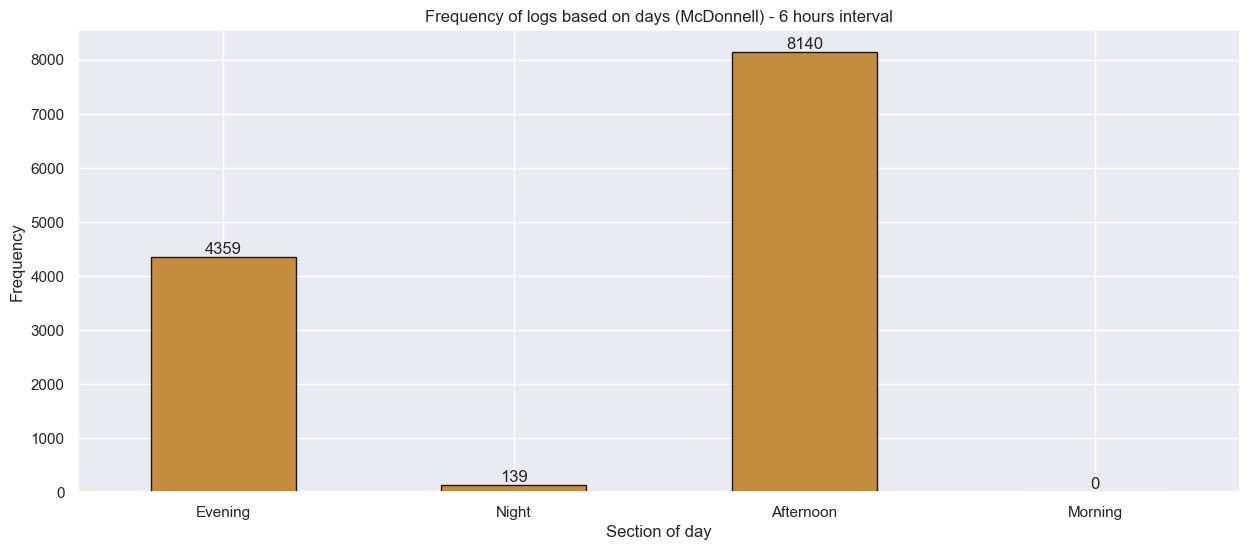

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'hour_of_day': [4359, 139, 8140, 0]}
index_values = ['(17.25, 23.0]', '(-0.023, 5.75]', '(11.5, 17.25]', '(5.75, 11.5]']

# Create a DataFrame
hist = pd.Series(data['hour_of_day'], index=index_values, name='hour_of_day')

# Map category indices to 'a' and 'b'
category_mapping = {'(17.25, 23.0]': 'Evening', '(-0.023, 5.75]': 'Night', '(11.5, 17.25]': 'Afternoon',
                    '(5.75, 11.5]': 'Morning'}
hist.index = hist.index.map(category_mapping)

# Plot the histogram
ax = hist.plot(kind='bar', edgecolor='k', alpha=1, figsize=(15, 6), color='#c38c3f')
plt.xlabel('Section of day')
plt.ylabel('Frequency')
plt.title('Frequency of logs based on days (McDonnell) - 6 hours interval')

# Add frequency values on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', va='bottom')

# Map x-axis labels to 'a', 'b'
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.savefig("figures/freq-day-mcd.jpeg")

plt.show()

In [43]:
df = pd.read_csv("data/MoveBankData/WNYRWC02-9422-moe.csv").drop(columns=['study-name', 'individual-local-identifier', 'tag-local-identifier', 'individual-taxon-canonical-name',
       'sensor-type', 'import-marked-outlier', 'visible', 'event-id'])

df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Extract hour of the day
df['hour_of_day'] = df['timestamp'].dt.hour

# Group by 6 hours and label each group
df['time_hr'] = (df['hour_of_day'] // 6).map({0: 'Night', 1: 'Morning', 2: 'Afternoon', 3: 'Evening'})
# df.head()

bdf = pd.cut(df['hour_of_day'], bins=4)

# bdf.value_counts()

(17.25, 23.0]     336
(-0.023, 5.75]    232
(11.5, 17.25]     175
(5.75, 11.5]      150
Name: hour_of_day, dtype: int64

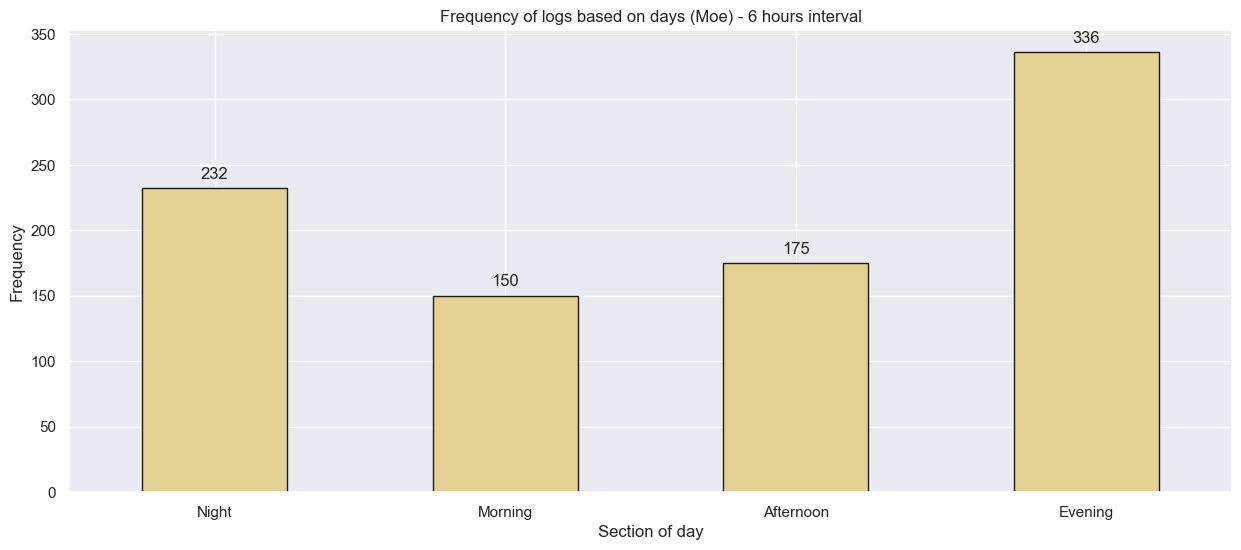

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'hour_of_day': list(bdf.value_counts().sort_index())}
index_values = ['(-0.023, 5.75]', '(5.75, 11.5]' , '(11.5, 17.25]', '(17.25, 23.0]']

# Create a DataFrame
hist = pd.Series(data['hour_of_day'], index=index_values, name='hour_of_day')

# Map category indices to 'a' and 'b'
category_mapping = {'(17.25, 23.0]': 'Evening', '(-0.023, 5.75]': 'Night', '(11.5, 17.25]': 'Afternoon',
                    '(5.75, 11.5]': 'Morning'}
hist.index = hist.index.map(category_mapping)

# line_colors = ['#e4d292', '#a49d3f', '#c38c3f']
# Plot the histogram
ax = hist.plot(kind='bar', edgecolor='k', alpha=1, figsize=(15, 6), color='#e4d292')
plt.xlabel('Section of day')
plt.ylabel('Frequency')
plt.title('Frequency of logs based on days (Moe) - 6 hours interval')

# Add frequency values on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', va='bottom')

# Map x-axis labels to 'a', 'b'
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.savefig("figures/freq-day-moe.jpeg")

plt.show()

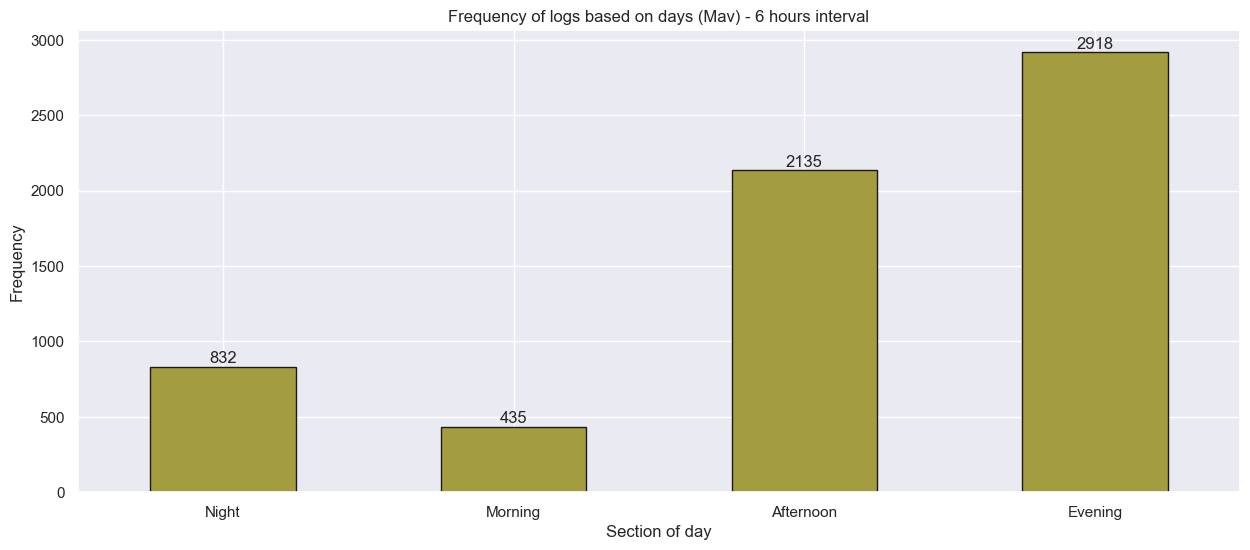

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/MoveBankData/WNYRWC01-7262-maverick.csv').drop(columns=['study-name', 'individual-local-identifier', 'tag-local-identifier', 'individual-taxon-canonical-name',
       'sensor-type', 'import-marked-outlier', 'visible', 'event-id'])

df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Extract hour of the day
df['hour_of_day'] = df['timestamp'].dt.hour

# Group by 6 hours and label each group
df['time_hr'] = (df['hour_of_day'] // 6).map({0: 'Night', 1: 'Morning', 2: 'Afternoon', 3: 'Evening'})
# df.head()

bdf = pd.cut(df['hour_of_day'], bins=4)

data = {'hour_of_day': list(bdf.value_counts().sort_index())}
index_values = ['(-0.023, 5.75]', '(5.75, 11.5]' , '(11.5, 17.25]', '(17.25, 23.0]']

# Create a DataFrame
hist = pd.Series(data['hour_of_day'], index=index_values, name='hour_of_day')

# Map category indices to 'a' and 'b'
category_mapping = {'(17.25, 23.0]': 'Evening', '(-0.023, 5.75]': 'Night', '(11.5, 17.25]': 'Afternoon',
                    '(5.75, 11.5]': 'Morning'}
hist.index = hist.index.map(category_mapping)

# line_colors = ['#e4d292', '#a49d3f', '#c38c3f']
# Plot the histogram
ax = hist.plot(kind='bar', edgecolor='k', alpha=1, figsize=(15, 6), color='#a49d3f')
plt.xlabel('Section of day')
plt.ylabel('Frequency')
plt.title('Frequency of logs based on days (Mav) - 6 hours interval')

# Add frequency values on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}', ha='center', va='bottom')

# Map x-axis labels to 'a', 'b'
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.savefig("figures/freq-day-mav.jpeg")

plt.show()